# Problema de la mochila

## Análisis de tiempos

In [12]:
%matplotlib inline
import timeit
import random
import matplotlib.pyplot as plt
import numpy as np
from math import floor

from functools import partial

from knapsack_file_parser import Parser
from knapsack import knapsack_bottom_up_aproximado

In [13]:
def plot_algorithms(problems, title='', savefig=False, filename_keyword='', step = 3, max_problems = 100, precision = 0.1):

    x, one_y, two_y = [], [], []
    one_times, two_times = [], []
    weight = 0

    cant_problems = 0
    for problem in problems:
        cant_problems += 1
        if cant_problems <= max_problems:
            if cant_problems % step == 0:
                print(str(cant_problems))
                one_timer = timeit.Timer(partial(knapsack_bottom_up_aproximado, problem.values, problem.max_value, problem.weights, problem.knapsack_weight, precision))
                two_timer = timeit.Timer(partial(knapsack_bottom_up_aproximado, problem.values, problem.max_value, problem.weights, problem.knapsack_weight, 0.5))

                one_y.append(one_timer.timeit(1))
                two_y.append(two_timer.timeit(1))

                x.append(problem.knapsack_weight)
                weight = problem.knapsack_weight

    plt.plot(x, one_y, label = 'Solución Aproximada (e = 0.1)')
    plt.plot(x, two_y, label = 'Solución Aproximada (e = 0.5)')

    plt.title(title)
    plt.ylabel('Tiempo de ejecución')
    plt.xlabel('Peso de la mochila')
    plt.legend(loc='upper left', prop={'size': 10})
    if savefig:
        # el nombre del archivo es: n_cantItems_maxWeight_123123.png
        filename = '_'.join(["n", str(len(problems[0].values)), 'maxWeight', str(weight)])
        plt.savefig('images/' + filename + filename_keyword +'.png', bbox_inches='tight')
    plt.show()

3
Precision: 0.1. Cantidad Items: 50. Max Value: 998
b: 1.996
Precision: 0.5. Cantidad Items: 50. Max Value: 998
b: 9.98
6
Precision: 0.1. Cantidad Items: 50. Max Value: 954
b: 1.9080000000000001
Precision: 0.5. Cantidad Items: 50. Max Value: 954
b: 9.540000000000001
9
Precision: 0.1. Cantidad Items: 50. Max Value: 986
b: 1.972
Precision: 0.5. Cantidad Items: 50. Max Value: 986
b: 9.86
12
Precision: 0.1. Cantidad Items: 50. Max Value: 975
b: 1.95
Precision: 0.5. Cantidad Items: 50. Max Value: 975
b: 9.75
15
Precision: 0.1. Cantidad Items: 50. Max Value: 1000
b: 2.0
Precision: 0.5. Cantidad Items: 50. Max Value: 1000
b: 10.0
18
Precision: 0.1. Cantidad Items: 50. Max Value: 998
b: 1.996
Precision: 0.5. Cantidad Items: 50. Max Value: 998
b: 9.98
21
Precision: 0.1. Cantidad Items: 50. Max Value: 998
b: 1.996
Precision: 0.5. Cantidad Items: 50. Max Value: 998
b: 9.98
24
Precision: 0.1. Cantidad Items: 50. Max Value: 986
b: 1.972
Precision: 0.5. Cantidad Items: 50. Max Value: 986
b: 9.86
27

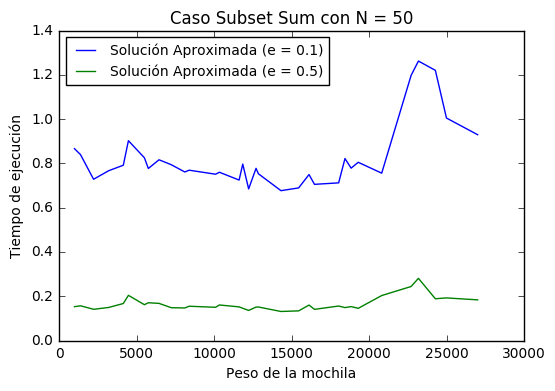

In [14]:
problems = Parser.parse_file('test_files/small_coef/knapPI_6_50_1000.csv')
list.sort(problems)
title = 'Caso Subset Sum con N = 50'
plot_algorithms(problems, title = title, savefig = True)

problems = Parser.parse_file('test_files/small_coef/knapPI_1_100_1000.csv')
list.sort(problems)
title = 'Caso Simple: N = 100'
plot_algorithms(problems, title = title, savefig = True)

5
Precision: 0.1. Cantidad Items: 100. Max Value: 2100
b: 2.1
10
Precision: 0.1. Cantidad Items: 100. Max Value: 1460
b: 1.46
15
Precision: 0.1. Cantidad Items: 100. Max Value: 1320
b: 1.32
20
Precision: 0.1. Cantidad Items: 100. Max Value: 1740
b: 1.74
25
Precision: 0.1. Cantidad Items: 100. Max Value: 1210
b: 1.21
30
Precision: 0.1. Cantidad Items: 100. Max Value: 1150
b: 1.1500000000000001
35
Precision: 0.1. Cantidad Items: 100. Max Value: 870
b: 0.87
40
Precision: 0.1. Cantidad Items: 100. Max Value: 2170
b: 2.17
45
Precision: 0.1. Cantidad Items: 100. Max Value: 2030
b: 2.0300000000000002
50
Precision: 0.1. Cantidad Items: 100. Max Value: 990
b: 0.99
55
Precision: 0.1. Cantidad Items: 100. Max Value: 1440
b: 1.44
60
Precision: 0.1. Cantidad Items: 100. Max Value: 1300
b: 1.3
65
Precision: 0.1. Cantidad Items: 100. Max Value: 1300
b: 1.3
70
Precision: 0.1. Cantidad Items: 100. Max Value: 1860
b: 1.86
75
Precision: 0.1. Cantidad Items: 100. Max Value: 1720
b: 1.72
80
Precision: 0.1.

FileNotFoundError: [Errno 2] No such file or directory: 'images/n_100_maxWeight_44534sspan.png'

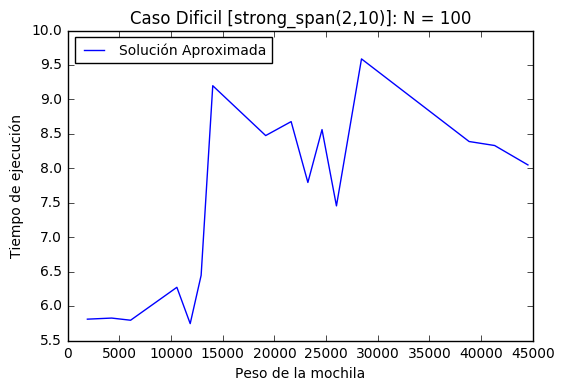

In [6]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_13_100_1000.csv')
list.sort(problems)
title = 'Caso Dificil [strong_span(2,10)]: N = 100'
plot_algorithms(problems, title = title, savefig = True, filename_keyword='sspan', step = 5, max_problems=80)

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80


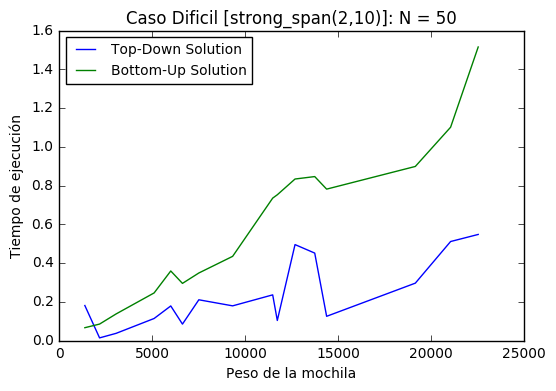

In [74]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_13_50_1000.csv')
list.sort(problems)
title = 'Caso Dificil [strong_span(2,10)]: N = 50'
plot_algorithms(problems, title = title, savefig = True, filename_keyword='sspan', step = 5, max_problems=80)

4
8
12
16
20
24
28
32
36
40
44
48
52
56
60


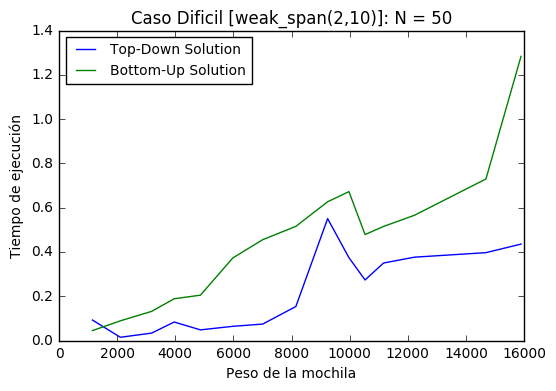

In [49]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_12_50_1000.csv')
list.sort(problems)
title = 'Caso Dificil [weak_span(2,10)]: N = 50'
plot_algorithms(problems, title = title, savefig = True, filename_keyword='wspan', step = 4, max_problems=60)

4
8
12
16
20
24
28
32
36
40
44
48
52
56
60


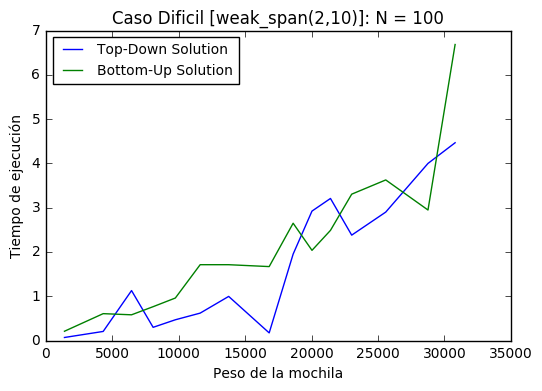

In [50]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_12_100_1000.csv')
list.sort(problems)
title = 'Caso Dificil [weak_span(2,10)]: N = 100'
plot_algorithms(problems, title = title, savefig = True, filename_keyword='wspan', step = 4, max_problems=60)

4
8
12
16
20
24
28
32
36
40
44
48
52
56
60


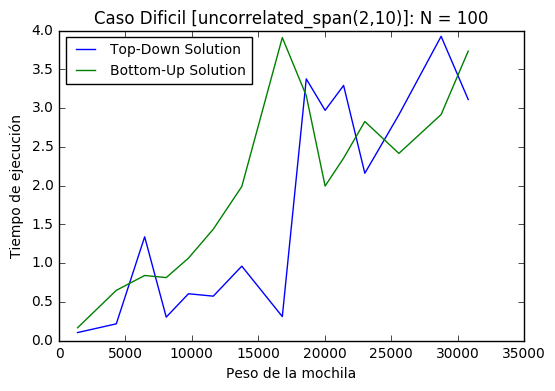

In [51]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_11_100_1000.csv')
list.sort(problems)
title = 'Caso Dificil [uncorrelated_span(2,10)]: N = 100'
plot_algorithms(problems, title = title, savefig = True, filename_keyword='uspan', step = 4, max_problems=60)

4
8
12
16
20
24
28
32
36
40
44
48
52
56
60


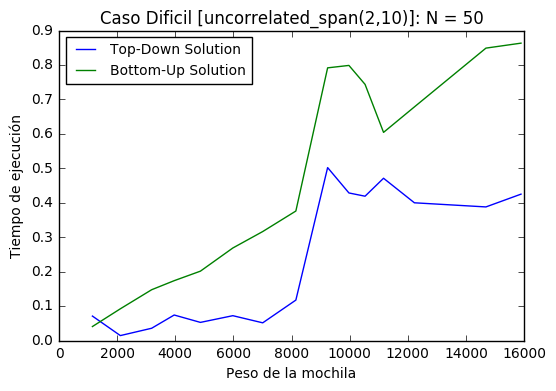

In [52]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_11_50_1000.csv')
list.sort(problems)
title = 'Caso Dificil [uncorrelated_span(2,10)]: N = 50'
plot_algorithms(problems, title = title, savefig = True, filename_keyword='uspan', step = 4, max_problems=60)

4
8
12
16
20
24
28
32
36
40
44
48
52
56
60
64
68
72
76
80


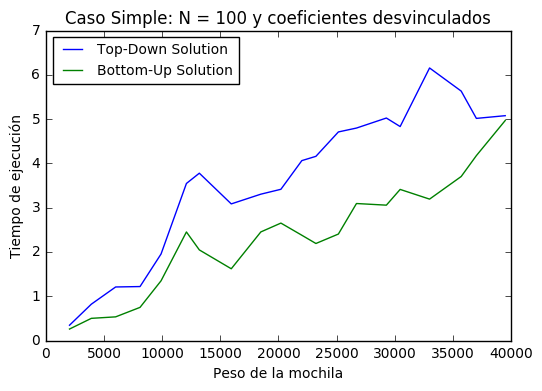

In [53]:
problems = Parser.parse_file('test_files/small_coef/knapPI_1_100_1000.csv')
list.sort(problems)
title = 'Caso Simple: N = 100 y coeficientes desvinculados'
plot_algorithms(problems, title = title, savefig = True, filename_keyword='ucorr', step = 4, max_problems=80)

4
8
12
16
20
24
28
32
36
40
44
48
52
56
60
64
68
72
76
80


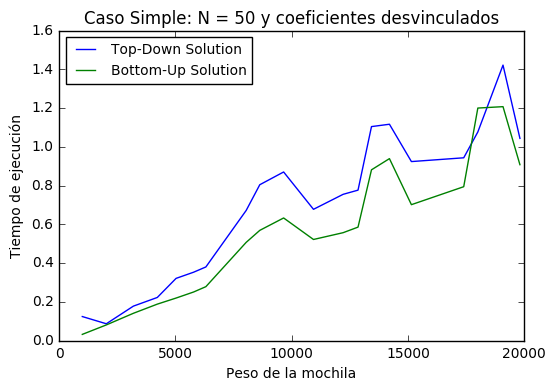

In [54]:
problems = Parser.parse_file('test_files/small_coef/knapPI_1_50_1000.csv')
list.sort(problems)
title = 'Caso Simple: N = 50 y coeficientes desvinculados'
plot_algorithms(problems, title = title, savefig = True, filename_keyword='ucorr', step = 4, max_problems=80)

In [ ]:
problems = Parser.parse_file('test_files/small_coef/knapPI_3_100_1000.csv')
list.sort(problems)
title = 'Caso Borde: N = 100, Strongly correlated'
plot_algorithms(problems, title = title, savefig = True)

In [ ]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_11_50_1000.csv')
list.sort(problems)
title = 'Caso Normal: N = 50 y elementos de relativamente poco peso'
plot_algorithms(problems, title = title, savefig = True)

In [ ]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_16_50_1000.csv')
list.sort(problems)
title = 'Caso Borde: N = 50, mochila pesada y elementos de mucho peso'
plot_algorithms(problems, title = title, savefig = True)

3
6
9
12
15
18
21
24
27
30


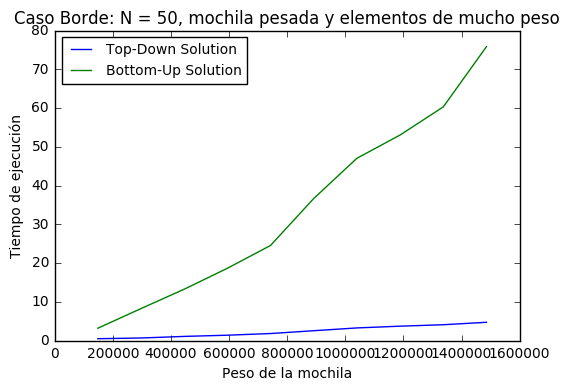

In [3]:
problems = Parser.parse_file('test_files/small_coef/knapPI_9_50_1000.csv')
list.sort(problems)
title = 'Caso Borde: N = 50, mochila pesada y elementos de mucho peso'
plot_algorithms(problems, title = title, savefig = True, filename_keyword='similarWeights', step=3, max_problem_id=30)